# Logistic Regression

## Agenda

1. Refresh your memory on how to do linear regression in scikit-learn
2. Attempt to use linear regression for classification
3. Show you why logistic regression is a better alternative for classification
4. Brief overview of probability, odds, e, log, and log-odds
5. Explain the form of logistic regression
6. Explain how to interpret logistic regression coefficients
7. Compare logistic regression with other models

## Part 1: Predicting a Continuous Response

In [16]:
# glass identification dataset
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass['assorted'] = glass.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})

In [17]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


Pretend that we want to predict **ri**, and our only feature is **al**. How would we do it using machine learning? linear regression

How would we **visualize** this model? 

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

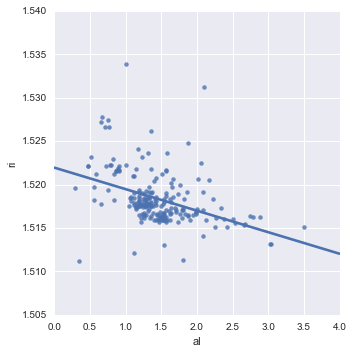

In [19]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

If we had an **al** value of 2, what would we predict for **ri**? 1.517



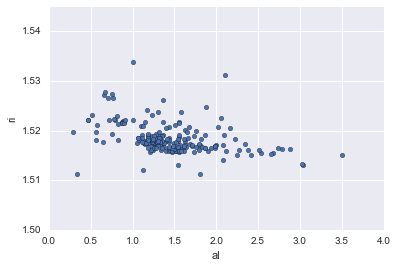

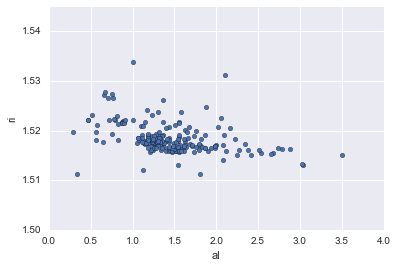

In [20]:
# Exercise: Draw the scatter plot using Pandas.

glass.plot.scatter(x='al', y='ri')

glass.plot(kind='scatter', x='al', y='ri')



In [21]:
# fit a linear regression model to predict ri from al
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# look at the coefficients to get the equation for the line, but then how do you plot the line?
print linreg.intercept_
print linreg.coef_

1.52194533024
[-0.00247761]


In [23]:
# you could make predictions for arbitrary points, and then plot a line connecting them
print linreg.predict(1)
print linreg.predict(2)
print linreg.predict(3)

[ 1.51946772]
[ 1.51699012]
[ 1.51451251]


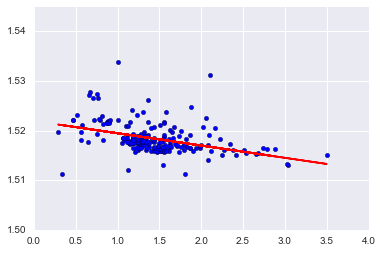

In [24]:
# or you could make predictions for all values of X, and then plot those predictions connected by a line
ri_pred = linreg.predict(X)

# draw regression line with matplotlib and pandas
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, ri_pred, color='red')

### Refresher: interpreting linear regression coefficients

Linear regression equation: $y = \beta_0 + \beta_1x$

In [25]:
# compute prediction for al=2 using the predict method
linreg.predict(2)

array([ 1.51699012])

In [26]:
# examine coefficient for al
pd.DataFrame(zip(feature_cols, linreg.coef_), columns=['feature', 'coef'])

,feature,coef
0,al,-0.002478


**Interpretation:** A 1 unit increase in 'al' is associated with a 0.0025 unit decrease in 'ri'.

In [28]:
# compute prediction for al=3 using the predict method
linreg.predict(3)
#linreg.pvalue

array([ 1.51451251])

In [14]:
# determine if this coeficient is segnificant = yes
import statsmodels.formula.api as smf
lm = smf.ols(formula='ri~al',data=glass).fit()
lm.pvalues

Intercept    0.000000e+00
al           5.847505e-10
dtype: float64

## Part 2: Predicting a Categorical Response

Let's change our task, so that we're predicting **assorted** using **al**. Let's visualize the relationship to figure out how to do this:

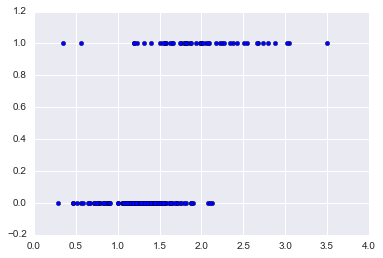

In [29]:
plt.scatter(glass.al, glass.assorted)

Let's draw a **regression line**, like we did before:

In [30]:
# fit a linear regression model and store the predictions
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted
linreg.fit(X, y)
assorted_pred = linreg.predict(X)

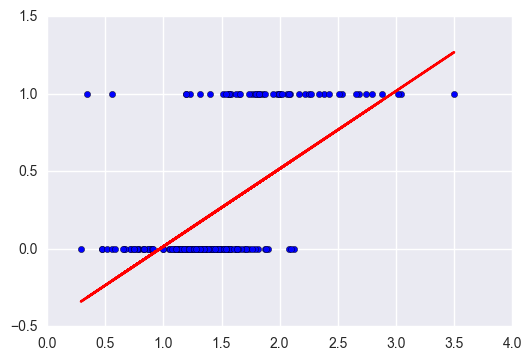

In [16]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred, color='red')

If **al=3**, what class do we predict for assorted? close to 1.0 => category 1.0

If **al=1.5**, what class do we predict for assorted? 0.0

So, we predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? 0.5


In [31]:
# understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

In [32]:
# np.where returns the first value if the condition is True, and the second value if the condition is False
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], 
      dtype='|S5')

In [33]:
# examine the predictions
assorted_pred[:10]

array([ 0.06545853,  0.19576455,  0.28597641,  0.16068216,  0.13562331,
        0.32607057,  0.08550561,  0.04039968,  0.20077632,  0.19576455])

In [34]:
# transform predictions to 1 or 0
assorted_pred_class = np.where(assorted_pred >= 0.5, 1, 0)
assorted_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1])

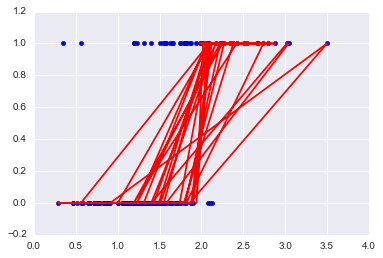

In [35]:
# plot the class predictions
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color='red')

What went wrong? This is a line plot, and it connects points in the order they are found. Let's sort the DataFrame by "al" to fix this:

In [36]:
# add predicted class to DataFrame
glass['assorted_pred_class'] = assorted_pred_class

# sort DataFrame by al
glass.sort('al', inplace=True)

C:\Users\zyousefi.ORADEV\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


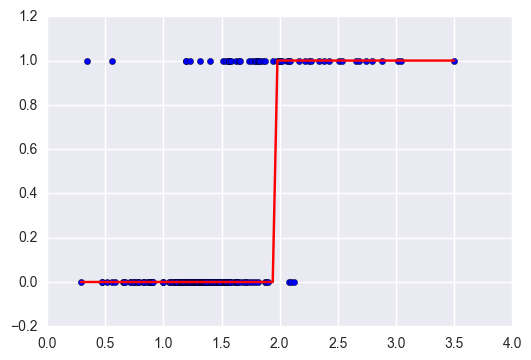

In [25]:
# plot the class predictions again
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, glass.assorted_pred_class, color='red')

## Part 3: Using Logistic Regression Instead

Logistic regression can do what we just did, but better..

In [37]:
# fit a linear regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.assorted
logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

In [38]:
# print the class predictions
assorted_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

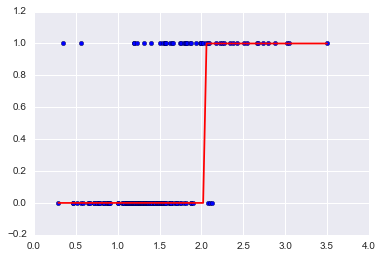

In [39]:
# plot the class predictions
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_class, color='red')

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [40]:
# store the predicted probabilites of class 1
assorted_pred_prob = logreg.predict_proba(X)[:, 1]

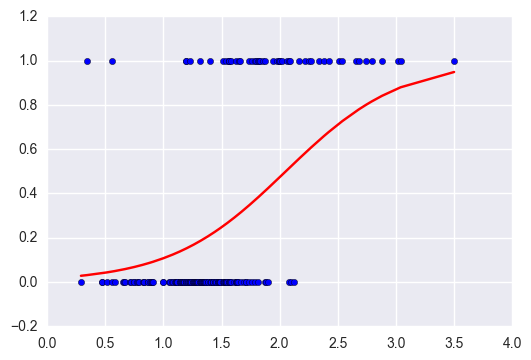

In [30]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_prob, color='red')

In [41]:
# examine some example predictions, probilility of being in one category 
print logreg.predict_proba(1)
print logreg.predict_proba(2) # first: probibility of 0 second value: p of being 1
print logreg.predict_proba(3)

[[ 0.89253652  0.10746348]]
[[ 0.52645662  0.47354338]]
[[ 0.12953623  0.87046377]]


What is this? 

## Part 4: Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

In [42]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [43]:
# exponential function: e^1
e = np.exp(1)
e

2.7182818284590451

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [44]:
# time needed to grow 1 unit to 2.718 units
np.log(e)

1.0

It is also the **inverse** of the exponential function:

In [45]:
np.log(np.exp(5))

5.0

In [46]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


## Part 5: What is Logistic Regression?

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

Probability is sometimes written as pi:

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the **logistic function**:

$$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

Notes:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data.

## Part 6: Interpreting Logistic Regression Coefficients

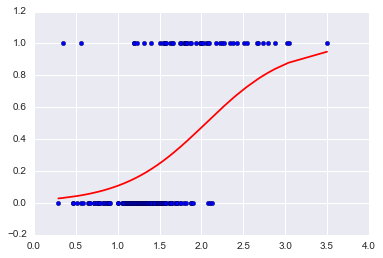

In [47]:
# plot the predicted probabilities again
plt.scatter(glass.al, glass.assorted)
plt.plot(glass.al, assorted_pred_prob, color='red')

In [48]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_ * 2
logodds

array([[-0.10592543]])

In [49]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([[ 0.89949172]])

In [50]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([[ 0.47354338]])

In [51]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([ 0.47354338])

In [52]:
# examine the coefficient for al
pd.DataFrame(zip(feature_cols, logreg.coef_), columns=['feature', 'coef'])

,feature,coef
0,al,[2.01099096417]


**Interpretation:** A 1 unit increase in 'al' is associated with a 2.0109 unit increase in the log-odds of 'assorted'.

In [53]:
# increasing al by 1 (so that al=3) increases the log-odds by 2.0109

# the -0.10592543 is the logodds we calculated a few cells ago for al=2
# I am stepping through the equation by one "unit" of al

logodds = -0.10592543 + 2.0109
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.87045351351387434

In [54]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([ 0.87046377])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [55]:
# examine the intercept
logreg.intercept_

array([-4.12790736])

**Interpretation:** For an 'al' value of 0, the log-odds of 'assorted' is -4.127

In [56]:
# convert log-odds to probability
# Probability of assorted is low if al = 0
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.01586095])

That makes sense from the plot above, because the probability of assorted=1 should be very low for such a low 'al' value.

![](logistic_betas.png)

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

## Part 7: Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Sensitive to irrelevant features
- Can't automatically learn feature interactions

## Bonus: Confusion Matrix



In [57]:
from sklearn import metrics
preds = logreg.predict(X)
print metrics.confusion_matrix(y, preds)
# Note that we can't make this martix using cross_val_score so a train_test_split has to do!

[[160   3]
 [ 31  20]]


##Top Left: True Negatives <Br>
##Top Right False Negatives <Br>
##Bottom Left: False Negatives <br>
##Bottom Right: True Positives <br>

In [58]:
print metrics.classification_report(y, preds)

             precision    recall  f1-score   support

          0       0.84      0.98      0.90       163
          1       0.87      0.39      0.54        51

avg / total       0.85      0.84      0.82       214



C:\Users\zyousefi.ORADEV\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


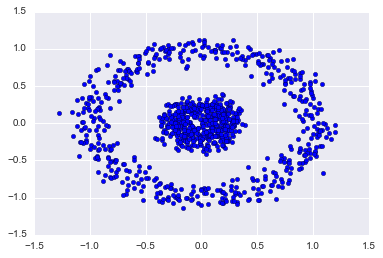

In [59]:
# MORE DATA

# Logistic Regression is a high bias low variance model 

from sklearn.datasets import make_circles
from sklearn.cross_validation import cross_val_score
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(circles_X[:,0], circles_X[:,1])

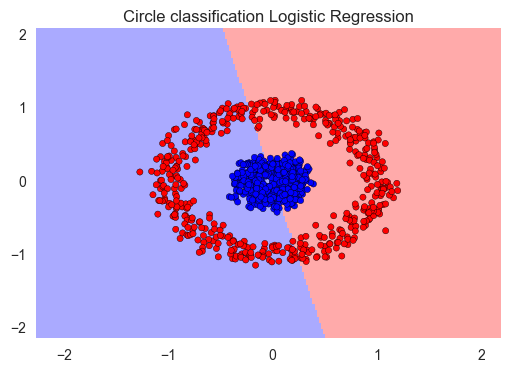

In [49]:
# It has a linear decision boundary, IE the shape is draws between classes are lines!

from matplotlib.colors import ListedColormap
import numpy as np

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(circles_X, circles_y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Circle classification Logistic Regression")

plt.show()

In [67]:
logreg = LogisticRegression()
cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()
# lame

0.48899999999999999

In [68]:
from sklearn.neighbors import KNeighborsClassifier  # compare to knn
knn = KNeighborsClassifier(n_neighbors=7)
cross_val_score(knn, circles_X, circles_y, cv=5, scoring='accuracy').mean()
# not as lame, remember?

1.0

In [69]:
from sklearn import datasets

# new dataset, handwritten digits!
digits = datasets.load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

9

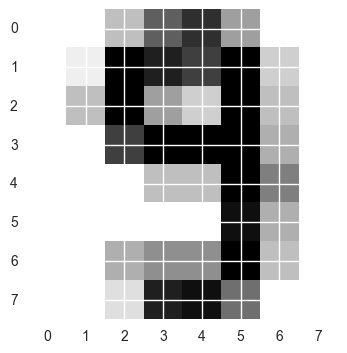

In [70]:
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')
# the number 9


digits.target[-5]

In [71]:
digits.data.shape
# 1,797 observations, 64 features (8 x 8 image)

(1797, 64)

In [72]:
digits_X, digits_y = digits.data, digits.target

In [73]:
logreg = LogisticRegression()
cross_val_score(logreg, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.92101881133607011

In [74]:
# compare to KNN
knn = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knn, digits_X, digits_y, cv=5, scoring='accuracy').mean()

0.9627899114966898

In [75]:
# Thought Exercise, why would KNN potentially be a better model than logsitci regression
# for handwriting?

In [76]:
# OK so wait, when should we use Logistic Regression?

In [77]:
# Using dataset of a 1978 survey conducted to measure likliehood of women to perform extramarital affairs
# http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html

import statsmodels.api as sm
affairs_df = sm.datasets.fair.load_pandas().data

In [78]:
affairs_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [79]:
affairs_df['affair_binary'] = (affairs_df['affairs'] > 0)

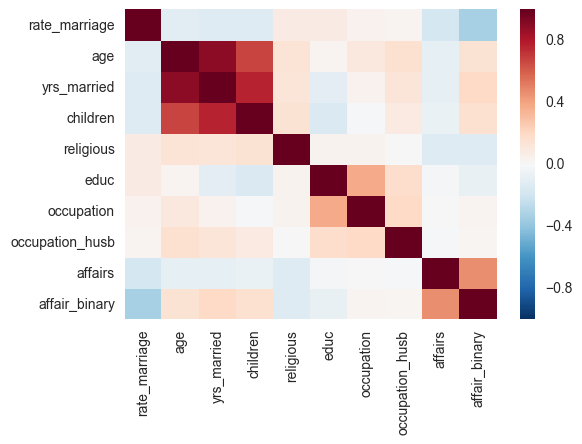

In [80]:
sns.heatmap(affairs_df.corr())

In [81]:
affairs_df.corr()
# Obviously affairs will correlate to affair_binary but what else?






# It seems children, yrs_married, rate_married, and age all correlate to affair_binary
# Remember correlations are NOT the single way to identify which features to use
# Correlations only give us a number determining how linearlly correlated the variables are
# We may find another variable that affects affairs by evaluating the coefficients of our LR

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614,0.017637
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000,0.464046
affair_binary,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,0.464046,1.000000


In [82]:
affairs_X = affairs_df.drop(['affairs', 'affair_binary'], axis=1)
affairs_y = affairs_df['affair_binary']

In [83]:
model = LogisticRegression()
from sklearn.cross_validation import cross_val_score
# check the accuracy on the training set
scores = cross_val_score(model, affairs_X, affairs_y, cv=10)
print scores
print scores.mean()

# Looks pretty good

[ 0.71630094  0.69749216  0.74137931  0.71226415  0.70125786  0.73113208
  0.71855346  0.70125786  0.74842767  0.75314465]
0.722121014964


In [145]:
# Dummy Variables:

# Encoding qualitiative (nominal) data using separate columns (see slides for linear regression for more)

<img src="images/dummy.png">

In [85]:
occuptation_dummies = pd.get_dummies(affairs_df['occupation'], prefix='occ_').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
affairs_df = pd.concat([affairs_df, occuptation_dummies], axis=1)
affairs_df.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary,occ__2.0,occ__3.0,occ__4.0,occ__5.0,occ__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True,1.0,0.0,0.0,0.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True,0.0,1.0,0.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True,0.0,1.0,0.0,0.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True,0.0,1.0,0.0,0.0,0.0


In [86]:
occuptation_dummies = pd.get_dummies(affairs_df['occupation_husb'], prefix='occ_husb_').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
affairs_df = pd.concat([affairs_df, occuptation_dummies], axis=1)
affairs_df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair_binary,occ__2.0,occ__3.0,occ__4.0,occ__5.0,occ__6.0,occ_husb__2.0,occ_husb__3.0,occ_husb__4.0,occ_husb__5.0,occ_husb__6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,True,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,True,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,True,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,True,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,True,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
# remove appropiate columns for feature set
affairs_X = affairs_df.drop(['affairs', 'affair_binary', 'occupation', 'occupation_husb'], axis=1)
affairs_y = affairs_df['affair_binary']

In [88]:
model = LogisticRegression()
model = model.fit(affairs_X, affairs_y)

# check the accuracy on the training set
model.score(affairs_X, affairs_y)

0.72588752748978946

In [89]:
pd.DataFrame(zip(affairs_X.columns, np.transpose(model.coef_)), columns = ['features', 'coef'])

,features,coef
0,rate_marriage,[-0.697845509654]
1,age,[-0.0563363245639]
2,yrs_married,[0.103892991874]
3,children,[0.0181853214414]
4,religious,[-0.368506640382]
5,educ,[0.00864737414573]
6,occ__2.0,[0.298118886549]
7,occ__3.0,[0.60815029105]
8,occ__4.0,[0.346511268985]
9,occ__5.0,[0.942259551778]


In [ ]:
# compare KNN to LR

In [90]:
knn = KNeighborsClassifier(n_neighbors=7)
cross_val_score(knn, affairs_X, affairs_y, cv=5, scoring='accuracy').mean()

0.68630248906529234

In [91]:
logreg = LogisticRegression()
cross_val_score(logreg, affairs_X, affairs_y, cv=5, scoring='accuracy').mean()

0.72558005785768587

In [162]:
# When we are investigating individual correlations between features and categorical responses
# Logistic regression has a good shot :)

# KNN relies on the entire n-space to make predictions while LR uses the model parameters to focus
# on one or more particular features

# LR has concept of "importance" of features